- 지금 보시는 Jupyter notebook은 창원대학교 신소재공학부 교과목인 소성가공, 유동해석, 유동해석특론과 관련하여 수치해석적인 접근법을 Python을 활용하여 보여주는 예입니다.
- 창원대학교 신소재공학부 조교수 **정영웅**
- 홈페이지 [링크](http://youngung.github.io)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- 아래의 함수들은 fig4-6에서 가져왔다. [링크](https://github.com/youngung/lectures/blob/master/ipynb/fig4-6_metalforming_hosford%26caddell.ipynb)를 참고하자.

In [4]:
def derive(n,x,y):
    return -n*(y**(n-1))*np.exp(-y)+(y**n)*exp(-y)
def obj(f0,n,x,y):
    return f0*(x**n)*np.exp(-x) - (y**n)*np.exp(-y)
def newton_raphson(f0,n,x,guess):
    y=guess
    tol=1e-10  
    f=tol*10
    it=0
    while (abs(f)>tol): 
        it=it+1
        df = derive(n,x,y)
        f  = obj(f0,n,x,y)
        y = y - f/df
        
        if (np.isnan(y)): raise IOError( 'is nan')
        if (it>100): raise IOError('Diverged.')
    return y

아래의 함수는 주어진 n 값과 $f_0$ 값을 기준으로 0<x<n 사이의 x 값을 대상으로 y값을 계산하여 x,y 곡선을
위의 세함수들을 사용하여 계산한다.

In [8]:
def xy_curve(n=0.25,f0=0.999):
    x=np.linspace(0.00,n,100)
    y=[]
    for i in range(len(x)):
        #print 'i:',i
        if i==0: guess=x[i]
        elif i>0: 
            guess = y[i-1]+0.0001 ## small tweak 
            # print 'guess:',guess
        guess=newton_raphson(f0,n,x[i],guess)
        y.append(guess)
    y=np.array(y)
    return x,y

/var/folders/q5/3zv1p7vn5tgd8vnh27x5w7vr0000gn/T/ipykernel_97448/565117045.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return -n*(y**(n-1))*np.exp(-y)+(y**n)*exp(-y)
/var/folders/q5/3zv1p7vn5tgd8vnh27x5w7vr0000gn/T/ipykernel_97448/565117045.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return -n*(y**(n-1))*np.exp(-y)+(y**n)*exp(-y)
/var/folders/q5/3zv1p7vn5tgd8vnh27x5w7vr0000gn/T/ipykernel_97448/565117045.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return -n*(y**(n-1))*np.exp(-y)+(y**n)*exp(-y)
/var/folders/q5/3zv1p7vn5tgd8vnh27x5w7vr0000gn/T/ipykernel_97448/565117045.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return -n*(y**(n-1))*np.exp(-y)+(y**n)*exp(-y)
/var/folders/q5/3zv1p7vn5tgd8vnh27x5w7vr0000gn/T/ipykernel_97448/565117045.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return -n*(y**(n-1))*np.exp(-y)+(y**n)*exp(-y)
/var/folders/q5/3zv1p7vn5tgd8vnh27x5w7vr0000g

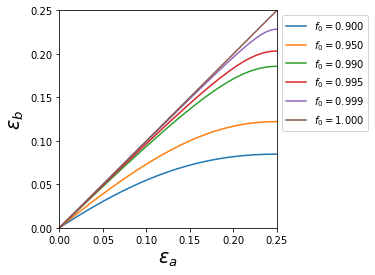

In [9]:

n=0.25
fs=np.array([0.9,0.95,0.99,0.995,0.999,1.])

ax=gca()
for i in range(len(fs)):
    x,y=xy_curve(n,fs[i])
    ax.plot(x,y,'-',label=r'$f_0=%.3f$'%fs[i])
    
## 아래는 그래프를 '꾸며'주는 명령어들입니다.
ax.set_ylim(0.,n)
ax.set_xlim(0.,n)
ax.set_xlabel(r'$\varepsilon_a$',fontsize=19)
ax.set_ylabel(r'$\varepsilon_b$',fontsize=19)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1,1.))

### 더 생각해보기
- 위의 [링크](https://github.com/youngung/lectures/blob/master/ipynb/fig4-6_metalforming_hosford%26caddell.ipynb)에 나타난 결과와의 차이를 살펴보면, 우선 주어진 구간내에서 모든 값들을 찾아낼 수 있었다.

- 위의 xy_curve 함수에서 사용된 algorithm을 설명할 수 있겠는가?